In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Uber Data.csv')

In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
df.shape

(6745, 6)

In [8]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [9]:
df.duplicated(subset='Request id',keep= False).sum()

0

In [10]:
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [11]:
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [12]:
df['Driver id'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [13]:
df['Request id'].unique

<bound method Series.unique of 0        619
1        867
2       1807
3       2532
4       3112
        ... 
6740    6745
6741    6752
6742    6751
6743    6754
6744    6753
Name: Request id, Length: 6745, dtype: int64>

### Data Preparation

In [14]:
df['Request Date Time'] = pd.to_datetime(df['Request timestamp'],dayfirst=True)
df['Drop Date Time'] = pd.to_datetime(df['Drop timestamp'],dayfirst=True)
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date Time,Drop Date Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   Request Date Time  6745 non-null   datetime64[ns]
 7   Drop Date Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.7+ KB


In [16]:
df = df.drop('Request timestamp',axis=1)
df = df.drop('Drop timestamp',axis=1)
df.head()

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request Date Time  6745 non-null   datetime64[ns]
 5   Drop Date Time     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [18]:
df['Request Date Time'].isnull().sum()

0

In [19]:
df['Request Date'] = df['Request Date Time'].dt.date
df['Request Time'] = df['Request Date Time'].dt.time
df.head(5)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,Request Date,Request Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


In [20]:
df['Request DayOfWeek'] = df['Request Date Time'].dt.day_name()
df.head(3)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,Request Date,Request Time,Request DayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday


In [21]:
df['Request hour'] = df['Request Date Time'].dt.hour
df.head(3)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,Request Date,Request Time,Request DayOfWeek,Request hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9


In [22]:
df.loc[df['Request hour'].between(0,3, inclusive=True),'Request timeslot'] = 'Late night'
df.loc[df['Request hour'].between(4,6, inclusive=True),'Request timeslot'] = 'Early morning'
df.loc[df['Request hour'].between(7,12, inclusive=True),'Request timeslot'] = 'Morning'
df.loc[df['Request hour'].between(13,17, inclusive=True),'Request timeslot'] = 'Afternoon'
df.loc[df['Request hour'].between(18,20, inclusive=True),'Request timeslot'] = 'Evening'
df.loc[df['Request hour'].between(21,24, inclusive=True),'Request timeslot'] = 'Night'
df.head()

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,Request Date,Request Time,Request DayOfWeek,Request hour,Request timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning


In [23]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request Date Time       0
Drop Date Time       3914
Request Date            0
Request Time            0
Request DayOfWeek       0
Request hour            0
Request timeslot        0
dtype: int64

In [24]:
df['Drop Date'] = df['Drop Date Time'].dt.date
df['Drop Time'] = df['Drop Date Time'].dt.time
df.head(5)

,Request id,Pickup point,Driver id,Status,Request Date Time,Drop Date Time,Request Date,Request Time,Request DayOfWeek,Request hour,Request timeslot,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Afternoon,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning,2016-07-13,09:25:47


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request Date Time  6745 non-null   datetime64[ns]
 5   Drop Date Time     2831 non-null   datetime64[ns]
 6   Request Date       6745 non-null   object        
 7   Request Time       6745 non-null   object        
 8   Request DayOfWeek  6745 non-null   object        
 9   Request hour       6745 non-null   int64         
 10  Request timeslot   6745 non-null   object        
 11  Drop Date          2831 non-null   object        
 12  Drop Time          2831 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory us

### Data Analysis

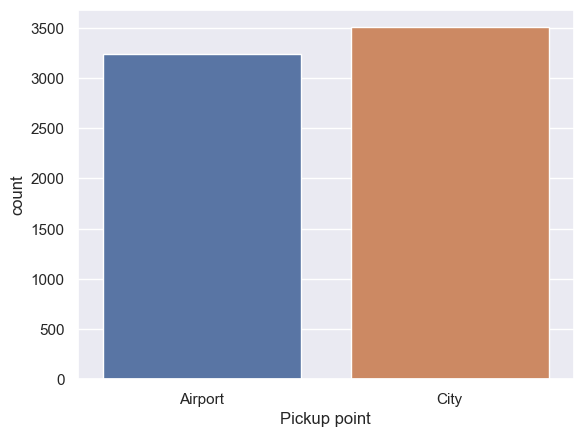

In [31]:
sns.set(style="darkgrid")
graph = sns.countplot(x="Pickup point", data=df)
plt.show()

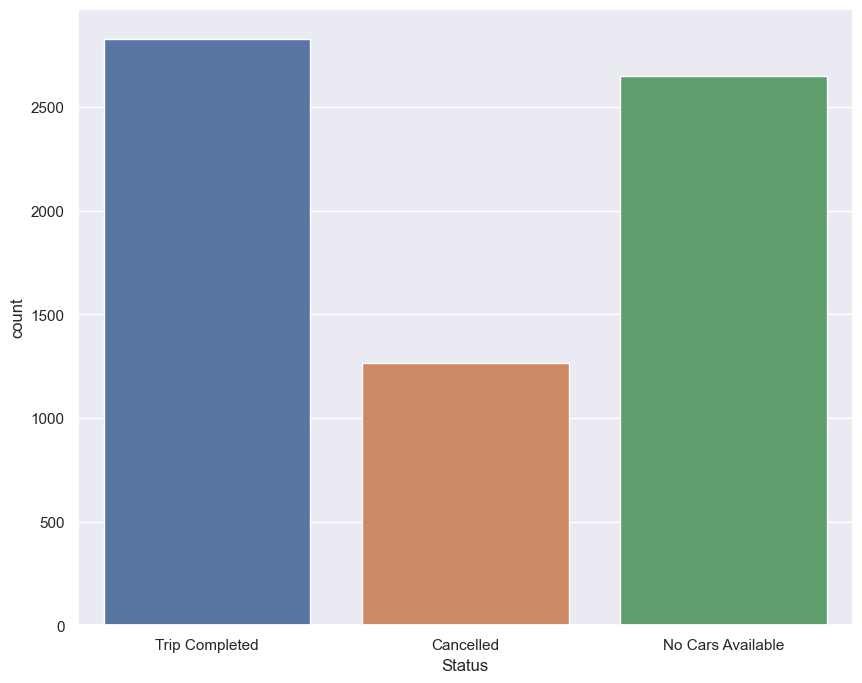

In [32]:
plt.figure(figsize=(10, 8))
graph =sns.countplot(x="Status", data=df)
plt.show()

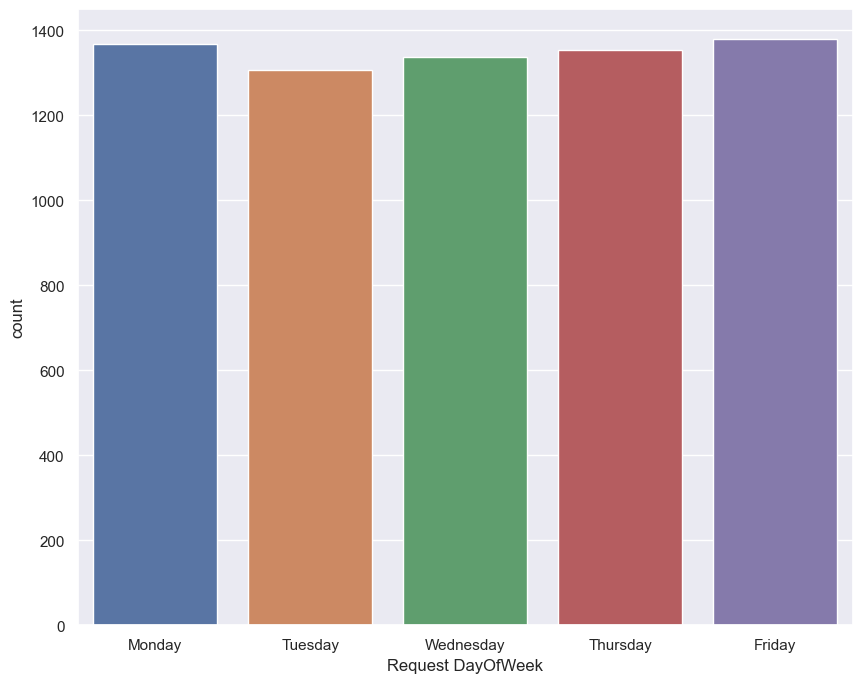

In [30]:
plt.figure( figsize=(10, 8))
graph=sns.countplot(x='Request DayOfWeek', data=df)
plt.show()

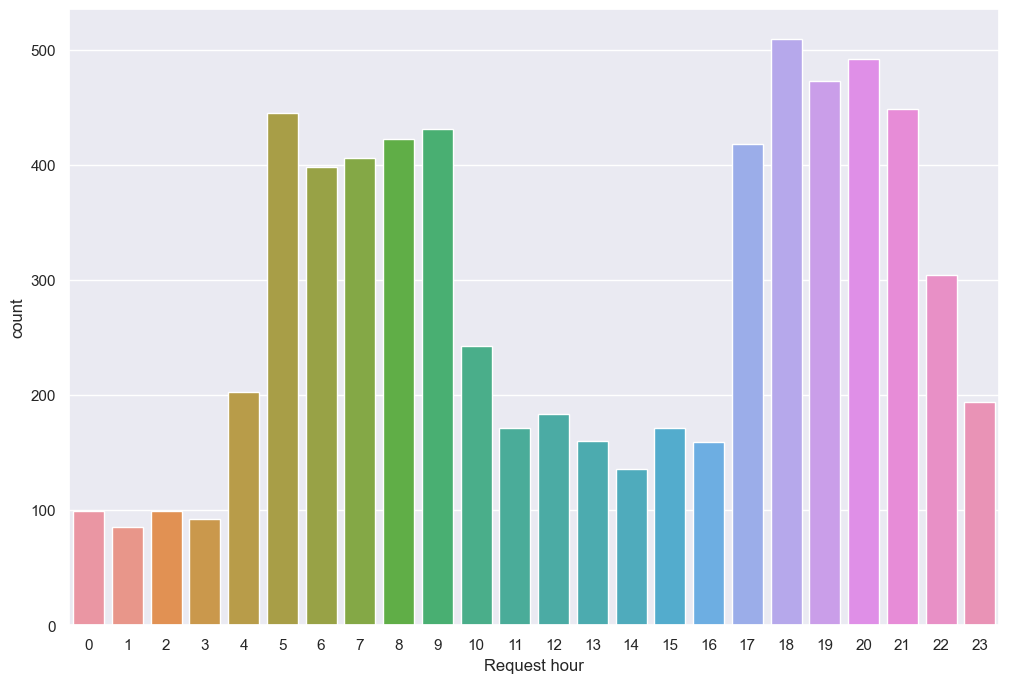

In [33]:
plt.figure( figsize=(12, 8))
graph=sns.countplot(x='Request hour', data=df)
plt.show()

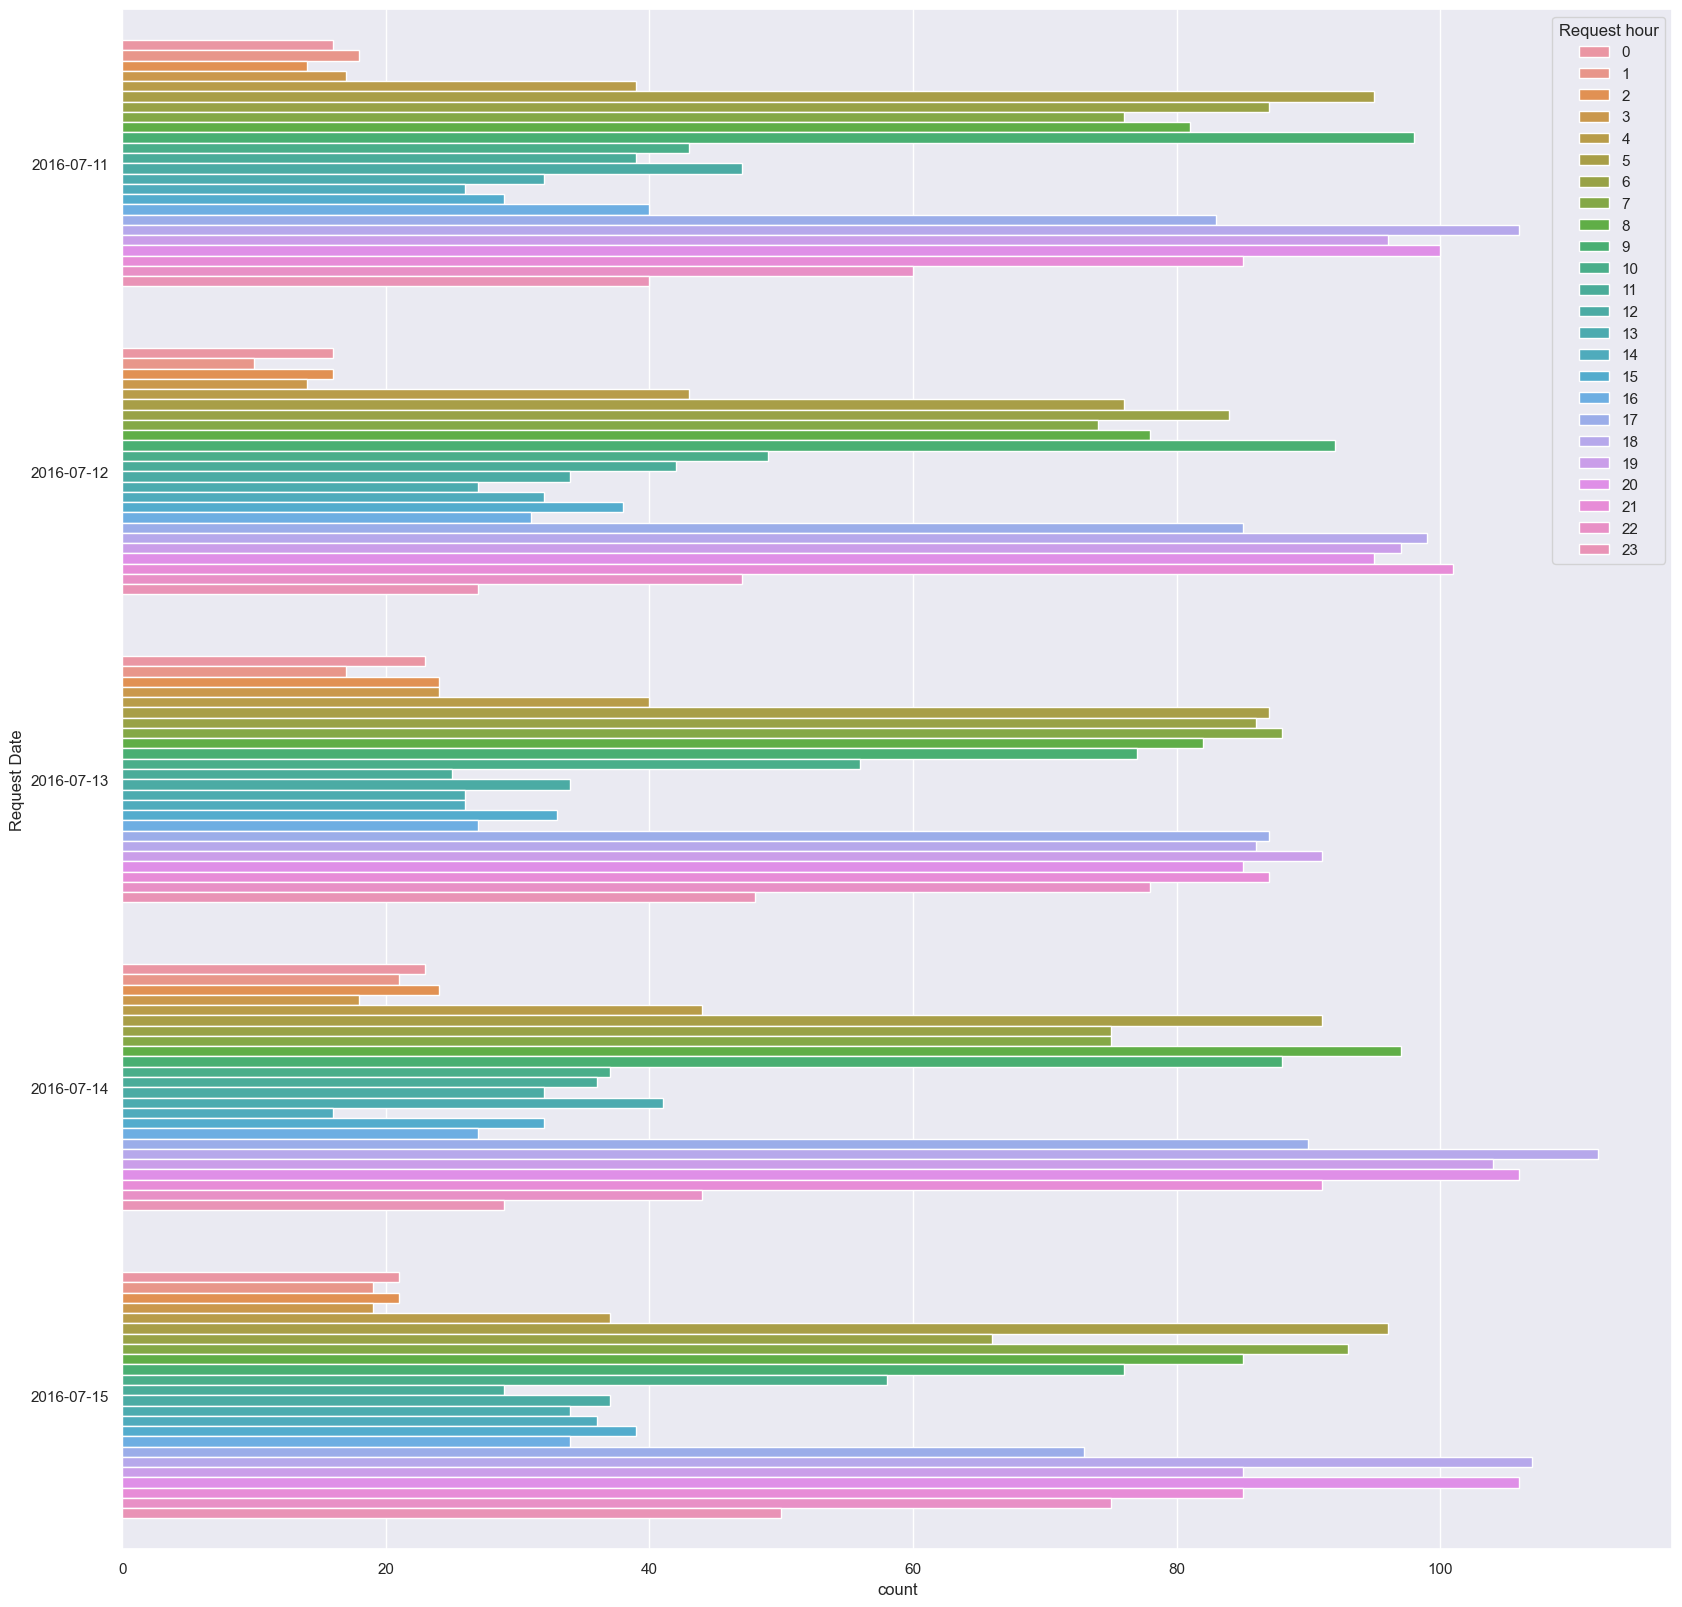

In [37]:
plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='b')
graph = sns.countplot(y='Request Date', hue="Request hour", data=df)
plt.show()

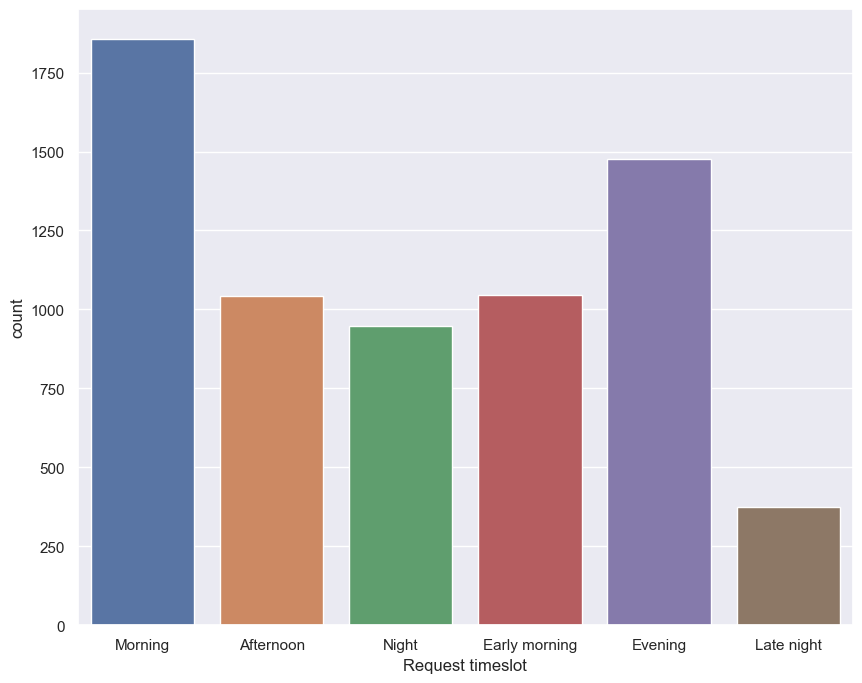

In [50]:
plt.figure( figsize=(10, 8))
graph =sns.countplot(x='Request timeslot', data=df)
plt.show()

### Observation:
    There isn't much difference in airport and city requests.
    There isn't much difference in requests vs days of theweek
    Highly request rates are from morning and evening timeslot
    Highly request rates are from 5am to 9am and 5pm to 10 pm

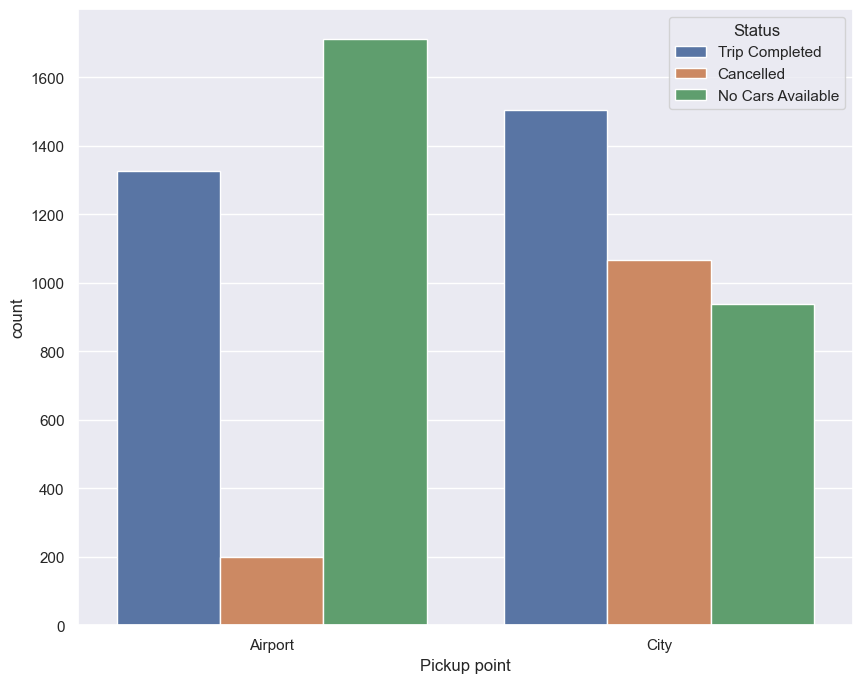

In [47]:
plt.figure( figsize=(10, 8))
graph =sns.countplot(x='Pickup point', hue="Status", data=df)
plt.show()

### Observation:
The above plot shows that for most of the  Airport pickup requests there are no cars available 
and most requests that get cancelled are from city pickup requests

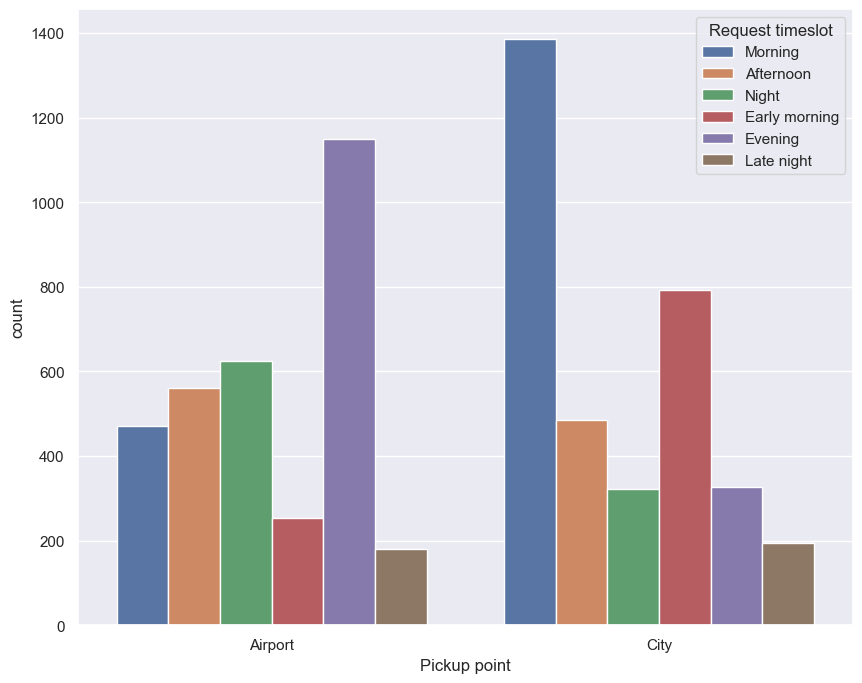

In [51]:
plt.figure( figsize=(10, 8))
sns.countplot(x='Pickup point', hue="Request timeslot", data=df)
plt.show()

### Observation:
        Airport - has the hightest request in the evening
        City- has the hightest request in the morning

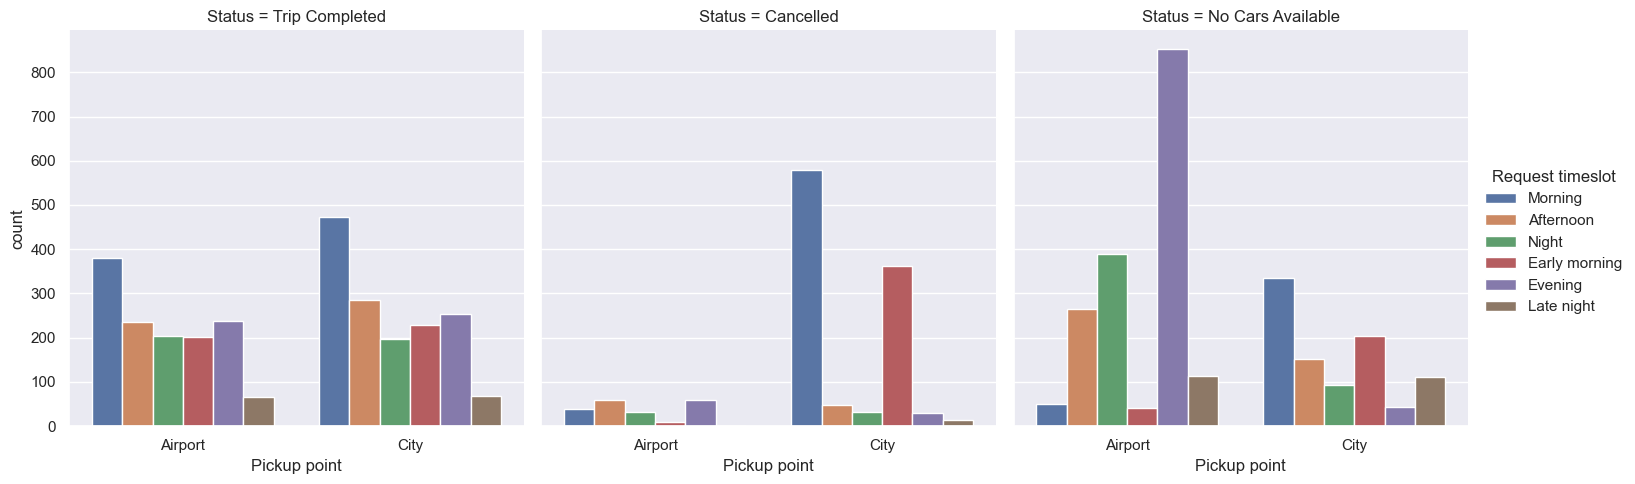

In [55]:
# Pickup Point vs Requested Timeslot
sns.catplot(x='Pickup point',col="Status", hue = 'Request timeslot',data=df ,kind="count")
plt.show()


### Observation:
    airport requests during the evening slot(during which there is high airport request rate)there are no cars available
    Most city requests get cancelled in the morning slot(during which there is high city request rate) 